## 4.1 Run ridge regression, choose the best $\lambda$

In [1]:
# import necessary modules
from setup_problem import load_problem
from ridge_regression import *

In [2]:
lasso_data_fname = "lasso_data.pickle"
x_train, y_train, x_val, y_val, target_fn, coefs_true, featurize = load_problem(lasso_data_fname)

""" 
4.1.1. Run ridge regression on the provided training dataset.  Choose the λ that minimizes
the empirical risk (i.e.  the average square loss) on the validation set.  Include
a table of the parameter values you tried and the validation performance for each. (10 points) 
"""
## to do
# Generate features
X_train = featurize(x_train)
X_val = featurize(x_val)

la = list(np.linspace(0,0.01,12))


lst = []

for l2_reg in la:
    ridge_regression_estimator = RidgeRegression(l2reg=l2_reg)
    ridge_regression_estimator.fit(X_train, y_train)
    lst.append(ridge_regression_estimator.score(X_val, y_val))
    
  
performance = np.array([la,lst]).transpose()

min_la = performance[np.argmin(performance, axis=0)[1]][0]

print(performance)
print("The mininized lambda is "+ str(min_la))

[[0.         0.14263219]
 [0.00090909 0.12385454]
 [0.00181818 0.12131812]
 [0.00272727 0.1204558 ]
 [0.00363636 0.12014296]
 [0.00454545 0.12002906]
 [0.00545455 0.12005831]
 [0.00636364 0.1201357 ]
 [0.00727273 0.12025977]
 [0.00818182 0.12040904]
 [0.00909091 0.12057836]
 [0.01       0.12075862]]
The mininized lambda is 0.004545454545454545


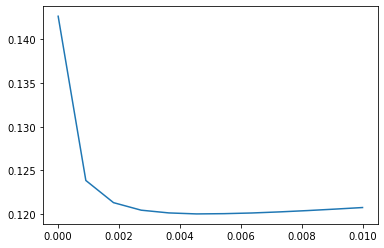

In [3]:
"""
4.1.2. Also include a plot of the results (Validation loss against l2 regularization parameters)
(5 points) 
Hint: you may want to use a log scale for the x axis
"""
## to do
import matplotlib.pyplot as plt
plt.plot(la,lst)
plt.show()


## 4.2 Visualize the prediction functions

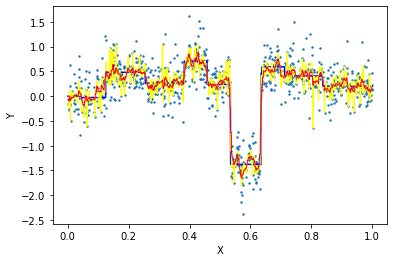

In [4]:
""" 
4.2 Now we want to visualize the prediction functions.  On the same axes, plot the following:
the training data, the target function, an unregularized least squares fit (still using the 
featurized data),and the prediction function chosen in the previous problem. (5 points) 
Hint: you may find plot_prediction_functions() from ridge_regression module useful
"""
# initialize a model with the λ chosen in 4.1, fit the model
ridge_regression_estimator = RidgeRegression(l2reg=min_la)
ridge_regression_estimator.fit(X_train, y_train)

for_visualize = []
ri = {}
ri['name'] = 'ridge regression'
ri['coefs'] = ridge_regression_estimator.w_
for_visualize.append(ri)


# initialize a model without regularization, fit the model
unregularized_estimator = RidgeRegression(l2reg=0)
unregularized_estimator.fit(X_train, y_train)
unreg = {}
unreg['name'] = 'unregularized'
unreg['coefs'] = unregularized_estimator.w_
for_visualize.append(unreg)

# Plot the training data, the target function, an unregularized least square fit, 
# the prediction function chosen in 4.1
plt.scatter(x_train, y_train, s = 2)
x = np.arange(0,1,0.001)
plt.plot(x, target_fn(x), "blue", label="target function")
plt.plot(x, featurize(x).dot(unregularized_estimator.w_), color="yellow", linewidth=1.0, label = "unregularized least squares fit")
plt.plot(x, featurize(x).dot(ridge_regression_estimator.w_), color="red", linewidth=1.0, label= "prediction function" )
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

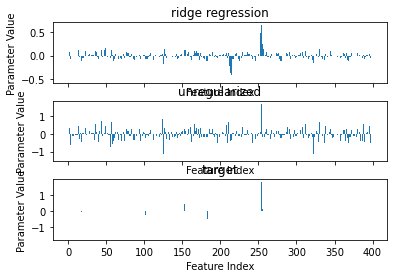

In [5]:
""" 
Next, along the lines of the bar charts produced by the code in compare_parameter_vectors, 
visualize the coefficients for each of the prediction functions plotted, including the target 
function. (5 points) 
Hint: you may find compare_parameter_vectors() from ridge_regression module useful
"""
targ = {'name':"target", 'coefs':coefs_true}
for_visualize.append(targ)

compare_parameter_vectors(for_visualize)
plt.show()

In [6]:
""" 
Describe the patterns, including the scale of the coefficients, as well as which coefficients 
have the most weight (5 points) 
"""
print('Compared with ridge regression, the parameters of unregularized regression have greater values.')
print('For unregularized regression, the weights of the coefficients are more scattered; while the weights of the coefficients of ridge regression are more concentrated.')
print("For both ridge regression and unregularized regression, the coefficient near the true one has the most weight")

Compared with ridge regression, the parameters of unregularized regression have greater values.
For unregularized regression, the weights of the coefficients are more scattered; while the weights of the coefficients of ridge regression are more concentrated.
For both ridge regression and unregularized regression, the coefficient near the true one has the most weight
